# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 10.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
161630,0.0146,0.0024,0.0513,0.0293,0.0024,0.0146,0.1001,0.1367,0.0562,0.0635,3,3,8,8
432127,0.0024,0.0049,0.0073,0.0244,0.0439,0.0073,0.0024,0.0098,0.0024,0.0024,0,0,0,0
198731,0.0439,0.1172,0.0391,0.0293,0.0366,0.0781,0.4346,0.9644,0.0024,0.2026,7,7,12,12
141927,0.0317,0.0024,0.0024,0.0024,0.0024,0.0024,0.0537,0.0781,0.0024,0.0024,0,0,0,0
53351,0.0024,0.1392,0.2808,0.0977,0.0317,0.1416,0.6152,0.5811,0.3345,0.8203,4,4,7,7


In [3]:
raw_data.shape

(457928, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457928 entries, 0 to 457927
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          457928 non-null  float64
 1   Emg2          457928 non-null  float64
 2   Emg3          457928 non-null  float64
 3   Emg4          457928 non-null  float64
 4   Emg5          457928 non-null  float64
 5   Emg6          457928 non-null  float64
 6   Emg7          457928 non-null  float64
 7   Emg8          457928 non-null  float64
 8   Emg9          457928 non-null  float64
 9   Emg10         457928 non-null  float64
 10  repetition    457928 non-null  int64  
 11  rerepetition  457928 non-null  int64  
 12  stimulus      457928 non-null  int64  
 13  restimulus    457928 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.9 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000
mean,0.019734,0.092321,0.083216,0.039534,0.026400,0.077164,0.301754,0.385765,0.156294,0.221862,3.219882,2.347234,5.706694,4.335299
std,0.079264,0.215375,0.215094,0.095570,0.055138,0.147718,0.381117,0.587775,0.381881,0.358927,3.488817,3.285902,6.594477,6.373268
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.075700,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.004900,0.002400,0.002400,0.002400,0.002400,0.024400,0.188000,0.151400,0.002400,0.092800,2.000000,0.000000,3.000000,0.000000
75%,0.014600,0.085400,0.068400,0.029300,0.022000,0.080600,0.371100,0.405300,0.134300,0.283200,6.000000,5.000000,10.000000,8.000000
max,2.480500,3.320300,4.653300,1.960400,2.763700,2.390100,4.663100,4.621600,4.665500,4.665500,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     189857
4      15495
12     15494
2      15493
8      15491
7      15490
6      15476
5      15465
11     15465
9      15462
10     15437
1      15433
3      15422
17     10334
14     10330
13     10327
15     10302
16     10249
19      5179
18      5167
21      5160
20      5139
22      5133
23      5128
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

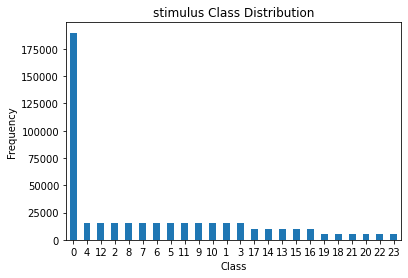

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
65437,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0757,0.0220,0.0024,0.0220,0,0,0,0
253206,0.0073,0.0024,0.0024,0.0024,0.0024,0.0073,0.1685,0.0610,0.0024,0.0610,0,0,0,0
429257,0.0024,0.3027,0.5151,0.2637,0.0171,0.0171,0.2368,0.8130,0.6128,0.1855,3,3,21,21
121814,0.0269,0.0024,0.0024,0.0024,0.0024,0.0024,0.0122,0.1343,0.0024,0.0024,0,0,0,0
229006,0.0024,0.1636,0.0854,0.0317,0.0293,0.0537,0.2368,1.4868,0.0293,0.1636,3,3,16,16


In [12]:
raw_data.shape

(379647, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379647 entries, 0 to 457927
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          379647 non-null  float64
 1   Emg2          379647 non-null  float64
 2   Emg3          379647 non-null  float64
 3   Emg4          379647 non-null  float64
 4   Emg5          379647 non-null  float64
 5   Emg6          379647 non-null  float64
 6   Emg7          379647 non-null  float64
 7   Emg8          379647 non-null  float64
 8   Emg9          379647 non-null  float64
 9   Emg10         379647 non-null  float64
 10  repetition    379647 non-null  int64  
 11  rerepetition  379647 non-null  int64  
 12  stimulus      379647 non-null  int64  
 13  restimulus    379647 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 43.4 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 82.85657842749902


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     37041
           1       0.77      0.75      0.76      2126
           2       0.71      0.71      0.71      2174
           3       0.80      0.80      0.80      2216
           4       0.78      0.79      0.78      2193
           5       0.75      0.74      0.75      2031
           6       0.72      0.75      0.73      2095
           7       0.75      0.75      0.75      2427
           8       0.71      0.69      0.70      2441
           9       0.67      0.67      0.67      2226
          10       0.67      0.70      0.68      2206
          11       0.65      0.67      0.66      2053
          12       0.76      0.76      0.76      2217
          13       0.67      0.70      0.69      1352
          14       0.70      0.70      0.70      1313
          15       0.70      0.71      0.71      1595
          16       0.79      0.78      0.79      1472
 

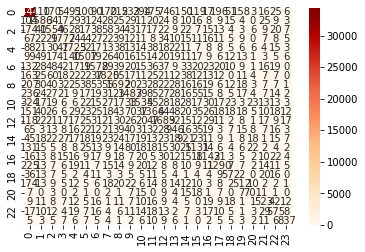

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 1.3136573159489002
MSE: 14.73530883708679
RMSE: 3.838659770946989


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8292066089719785
Recall Score :  0.8285657842749902
f1_score :  0.8288225516354059


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 86.84051099697089


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     37041
           1       0.85      0.83      0.84      2126
           2       0.79      0.77      0.78      2174
           3       0.86      0.84      0.85      2216
           4       0.89      0.84      0.87      2193
           5       0.86      0.79      0.82      2031
           6       0.86      0.76      0.81      2095
           7       0.82      0.82      0.82      2427
           8       0.79      0.75      0.77      2441
           9       0.73      0.66      0.69      2226
          10       0.79      0.67      0.73      2206
          11       0.78      0.72      0.75      2053
          12       0.86      0.77      0.81      2217
          13       0.77      0.69      0.73      1352
          14       0.88      0.70      0.78      1313
          15       0.76      0.74      0.75      1595
          16       0.86      0.79      0.83      1472
 

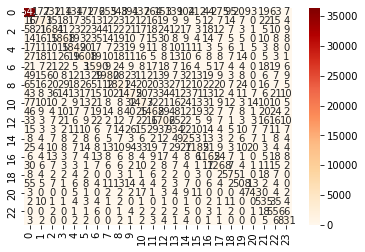

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 1.0372316607401555
MSE: 11.814842618200975
RMSE: 3.4372725551228807


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.8656446281315391
Recall Score :  0.868405109969709
f1_score :  0.8647296186833311


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 92.4377716317661


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     37041
           1       0.96      0.89      0.92      2126
           2       0.91      0.83      0.87      2174
           3       0.95      0.92      0.93      2216
           4       0.97      0.89      0.93      2193
           5       0.96      0.87      0.91      2031
           6       0.95      0.87      0.91      2095
           7       0.89      0.88      0.89      2427
           8       0.89      0.85      0.87      2441
           9       0.88      0.79      0.83      2226
          10       0.89      0.80      0.84      2206
          11       0.90      0.82      0.86      2053
          12       0.95      0.89      0.92      2217
          13       0.93      0.85      0.89      1352
          14       0.96      0.85      0.90      1313
          15       0.91      0.84      0.87      1595
          16       0.96      0.93      0.94      1472
 

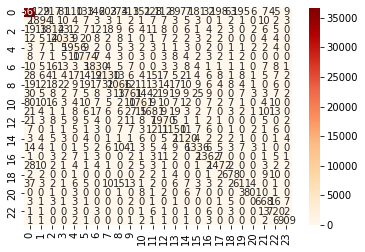

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.6352956670617674
MSE: 7.5141841169498225
RMSE: 2.7412012178878484


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9246226929606662
Recall Score :  0.924377716317661
f1_score :  0.9230760697915675


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[14:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 85.82378506519163


Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     37041
           1       0.85      0.77      0.81      2126
           2       0.76      0.68      0.72      2174
           3       0.86      0.82      0.84      2216
           4       0.89      0.76      0.82      2193
           5       0.86      0.74      0.79      2031
           6       0.85      0.71      0.77      2095
           7       0.77      0.79      0.78      2427
           8       0.72      0.71      0.72      2441
           9       0.76      0.63      0.69      2226
          10       0.79      0.67      0.73      2206
          11       0.72      0.64      0.68      2053
          12       0.83      0.75      0.79      2217
          13       0.75      0.69      0.72      1352
          14       0.83      0.71      0.77      1313
          15       0.79      0.77      0.78      1595
          16       0.86      0.81      0.83      1472
 

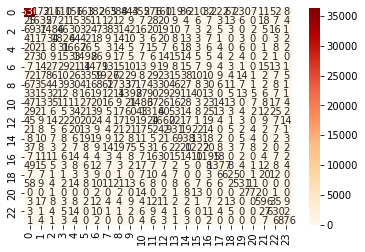

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 1.0472540497826945
MSE: 11.550507045963387
RMSE: 3.398603690629931


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8544667846482732
Recall Score :  0.8582378506519163
f1_score :  0.8541860502622811


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 92.93164757013038


Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     37041
           1       0.98      0.90      0.93      2126
           2       0.93      0.85      0.89      2174
           3       0.97      0.93      0.95      2216
           4       0.98      0.91      0.94      2193
           5       0.97      0.88      0.92      2031
           6       0.96      0.88      0.92      2095
           7       0.91      0.89      0.90      2427
           8       0.90      0.86      0.88      2441
           9       0.91      0.79      0.85      2226
          10       0.90      0.80      0.85      2206
          11       0.92      0.83      0.88      2053
          12       0.96      0.90      0.93      2217
          13       0.94      0.87      0.90      1352
          14       0.98      0.87      0.92      1313
          15       0.91      0.85      0.87      1595
          16       0.98      0.94      0.96      1472
 

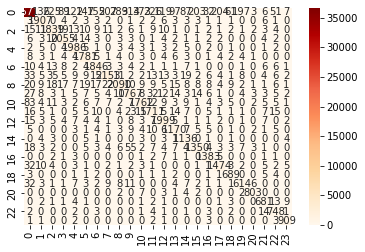

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.6129461345976558
MSE: 7.323969445541946
RMSE: 2.706283326915707


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9302375212055042
Recall Score :  0.9293164757013038
f1_score :  0.9281758509740272
